## Importing libraries

In [1030]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1031]:
from sklearn.impute import SimpleImputer

## Loading .arff type files

In [1032]:
df = arff.loadarff('1year.arff')
df = pd.DataFrame(df[0])

In [1033]:
df.sample(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
3169,0.109970,0.56484,-0.04034,0.92858,-25.7470,0.109970,0.143990,0.77037,1.0766,0.43513,...,0.071107,0.252720,0.92889,0.000000,21.5660,5.8640,86.896,4.2004,4.9896,b'0'
3375,0.076408,0.77870,-0.38147,0.51012,-46.1230,0.000000,0.095802,0.28419,3.5545,0.22130,...,0.034248,0.345270,0.97308,0.000000,75.8830,10.6100,79.963,4.5646,5.8969,b'0'
6683,0.237270,0.73362,0.26638,1.36310,7.4458,-0.025436,0.301370,0.36310,5.8933,0.26638,...,0.036084,0.890740,0.95340,0.000000,52.8720,8.3506,45.437,8.0332,NaN,b'0'
4367,0.149680,0.18502,0.38591,3.18590,109.7700,0.000000,0.184910,4.40480,1.0798,0.81498,...,0.164740,0.183670,0.83091,0.000000,8.3901,5.3861,59.674,6.1166,2.4679,b'0'
5274,0.006537,0.72383,0.10615,1.14730,8.6947,0.145400,0.006537,0.38153,8.3844,0.27617,...,0.256980,0.023669,1.01930,0.011864,171.9800,11.5910,31.368,11.6360,48.3840,b'0'


## Renaming input and target variable

In [1034]:
# Rename input columns to X(n) format
input_columns = df.columns[:-1]  # Exclude the last column (target column)
renamed_input_columns = [f"X({n})" for n in range(1, len(input_columns) + 1)]
df.rename(columns=dict(zip(input_columns, renamed_input_columns)), inplace=True)

# Rename target column to 'Y'
df.rename(columns={'class': 'Y'}, inplace=True)

In [1035]:
df.sample(5)

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
3919,0.026465,0.72860,-0.109300,0.84673,-30.0860,0.000000,0.029234,0.37445,2.34030,0.27283,...,0.021168,0.097001,0.98755,0.008793,30.1180,4.7182,111.220,3.2817,5.9076,b'0'
901,0.109150,0.67433,0.297010,1.44050,-9.1068,0.000000,0.137630,0.48295,2.40990,0.32567,...,0.059165,0.335140,0.94295,0.000000,6.9187,4.8601,102.130,3.5737,84.0930,b'0'
2362,-0.014557,0.82775,0.037916,1.05370,-35.2140,-0.010789,-0.014557,0.16503,0.98932,0.13660,...,-0.010797,-0.106570,1.01080,0.894280,8.6524,4.1116,125.640,2.9051,7.9916,b'0'
4112,0.172320,0.67991,-0.323110,0.41238,-102.8600,0.135440,0.222490,0.45979,1.16330,0.31262,...,0.140390,0.551220,0.85961,0.415990,87.5700,14.9730,112.160,3.2542,2.3141,b'0'
6059,0.152750,0.66203,0.203670,1.57210,7.9567,0.000000,0.152750,0.51051,3.39180,0.33797,...,0.148310,0.451970,0.85533,0.000000,24.5400,9.1310,38.307,9.5282,7.7023,b'0'


## Understanding the data

In [1036]:
# Get the shape (no of rows & columns) in our dataset

df.shape

(7027, 65)

In [1037]:
# Understanding Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X(1)    7024 non-null   float64
 1   X(2)    7024 non-null   float64
 2   X(3)    7024 non-null   float64
 3   X(4)    6997 non-null   float64
 4   X(5)    7019 non-null   float64
 5   X(6)    7024 non-null   float64
 6   X(7)    7024 non-null   float64
 7   X(8)    7002 non-null   float64
 8   X(9)    7026 non-null   float64
 9   X(10)   7024 non-null   float64
 10  X(11)   6988 non-null   float64
 11  X(12)   6997 non-null   float64
 12  X(13)   7027 non-null   float64
 13  X(14)   7024 non-null   float64
 14  X(15)   7025 non-null   float64
 15  X(16)   7002 non-null   float64
 16  X(17)   7002 non-null   float64
 17  X(18)   7024 non-null   float64
 18  X(19)   7027 non-null   float64
 19  X(20)   7027 non-null   float64
 20  X(21)   5405 non-null   float64
 21  X(22)   7024 non-null   float64
 22  

In [1038]:
df.describe()

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(55),X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64)
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


## Dropping duplicate rows

In [1039]:
df.shape

(7027, 65)

In [1040]:
df.duplicated().sum()

82

In [1041]:
df.drop_duplicates(inplace = True)

In [1042]:
df.shape

(6945, 65)

## Replacing the values of target variable; replacing b'0' by 0 and b'1' by 1.

In [1043]:
df['Y'].value_counts()

b'0'    6674
b'1'     271
Name: Y, dtype: int64

In [1044]:
df = pd.get_dummies(df,columns=['Y'],drop_first=True)

In [1045]:
# Renaming target column again to 'Y'
df.rename(columns={"Y_b'1'": 'Y'}, inplace=True)
df

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,1
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,1
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,1


## Handling missing values

In [1046]:
# Get the no of missing data points per column

df.isnull().sum()

X(1)      3
X(2)      3
X(3)      3
X(4)     29
X(5)      8
         ..
X(61)    21
X(62)     0
X(63)    29
X(64)    34
Y         0
Length: 65, dtype: int64

In [1047]:
# Get the percentage of missing data points per column

df.isnull().mean()*100

X(1)     0.043197
X(2)     0.043197
X(3)     0.043197
X(4)     0.417567
X(5)     0.115191
           ...   
X(61)    0.302376
X(62)    0.000000
X(63)    0.417567
X(64)    0.489561
Y        0.000000
Length: 65, dtype: float64

In [1048]:
# Percentage of data that is missing

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')

Percentage of data that is missing in entire dataset : 1.2781746691033948 % .


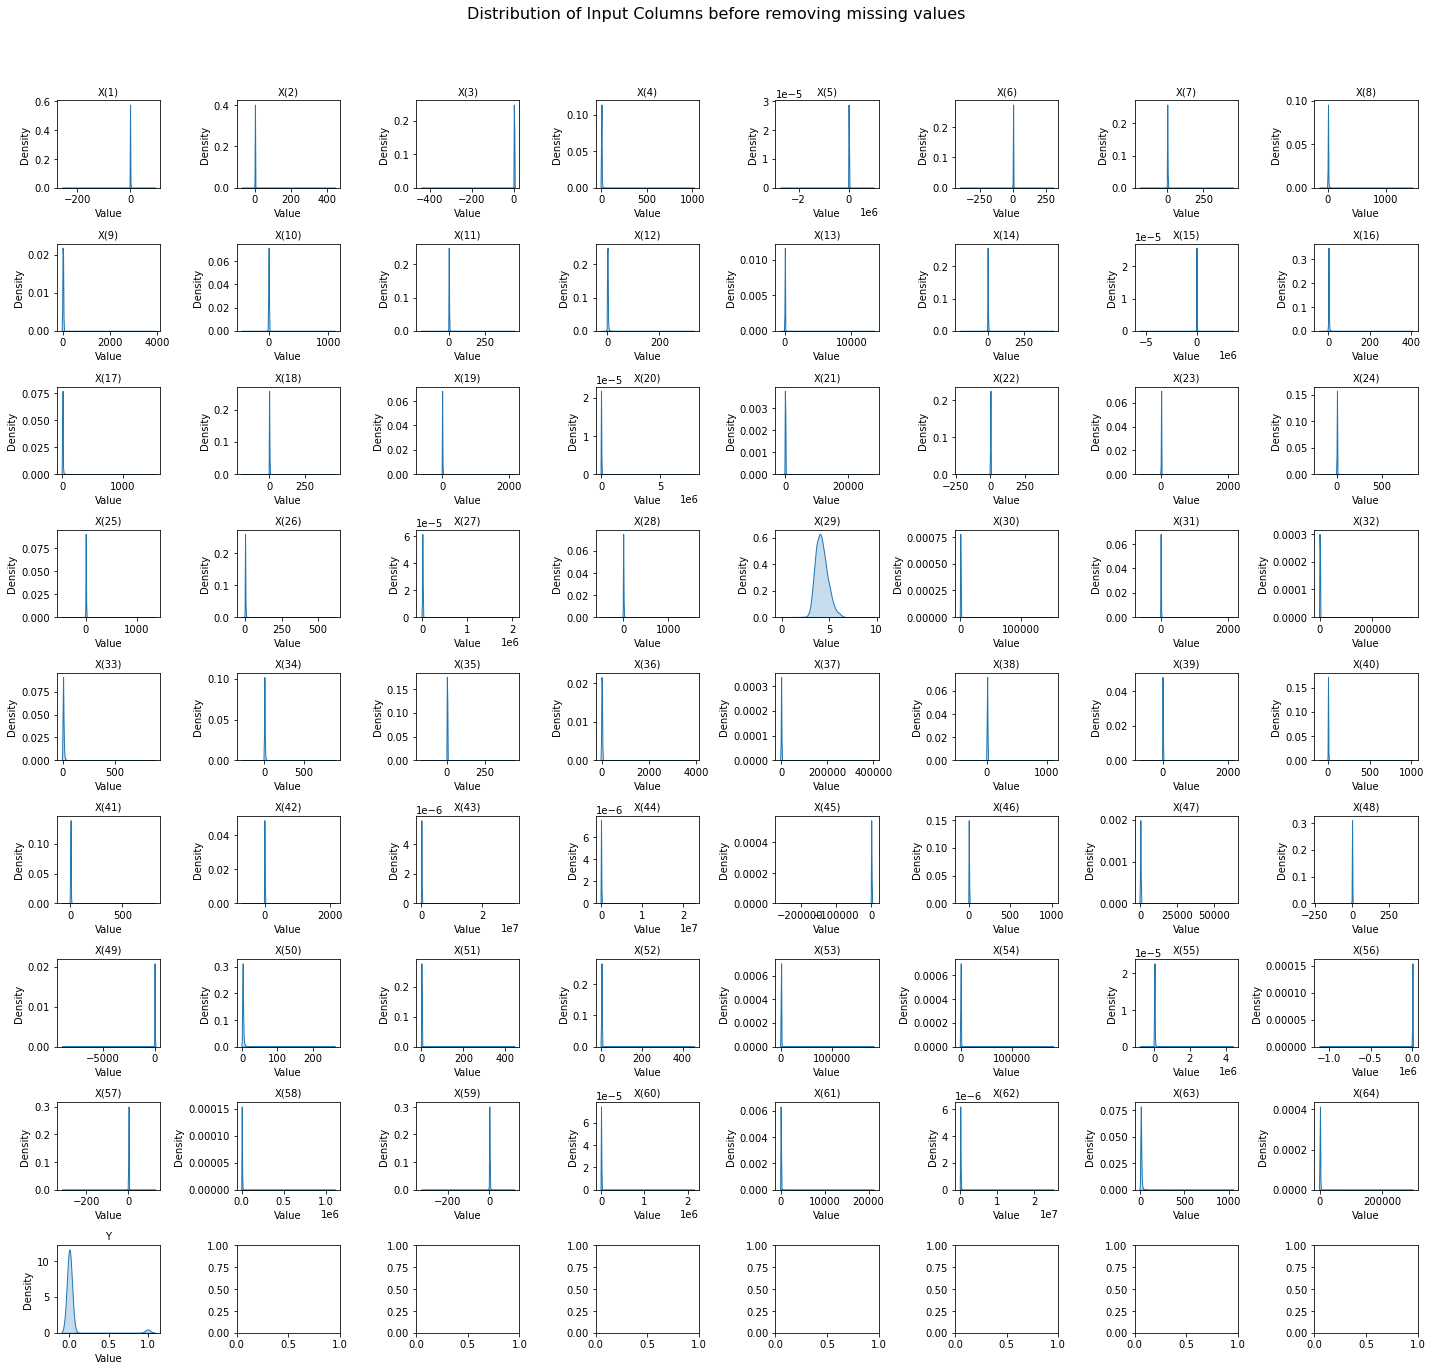

In [1049]:
# Calculate the number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

# Create subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns before removing missing values', fontsize=16)

# Iterate through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [1050]:
import pandas as pd
from sklearn.impute import SimpleImputer

def fill_missing_values(dataset):
    Y = None 
    if Y in dataset.columns:
        target = dataset[Y]
        features = dataset.drop(columns=[Y])
    else:
        features = dataset
    
    # Initialize the imputer with median
    imputer = SimpleImputer(strategy='median')
    
    # Fit and transform the features using the imputer
    filled_features = imputer.fit_transform(features)
    
    # Convert the filled features back to a DataFrame
    filled_features_df = pd.DataFrame(filled_features, columns=features.columns)
    
    # Concatenate target variable back
    if Y in dataset.columns:
        filled_features_df[Y] = target
    
    return filled_features_df

df = fill_missing_values(df)


In [1051]:
# Checking again just to make sure that whether data contain missing values or not.

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')

Percentage of data that is missing in entire dataset : 0.0 % .


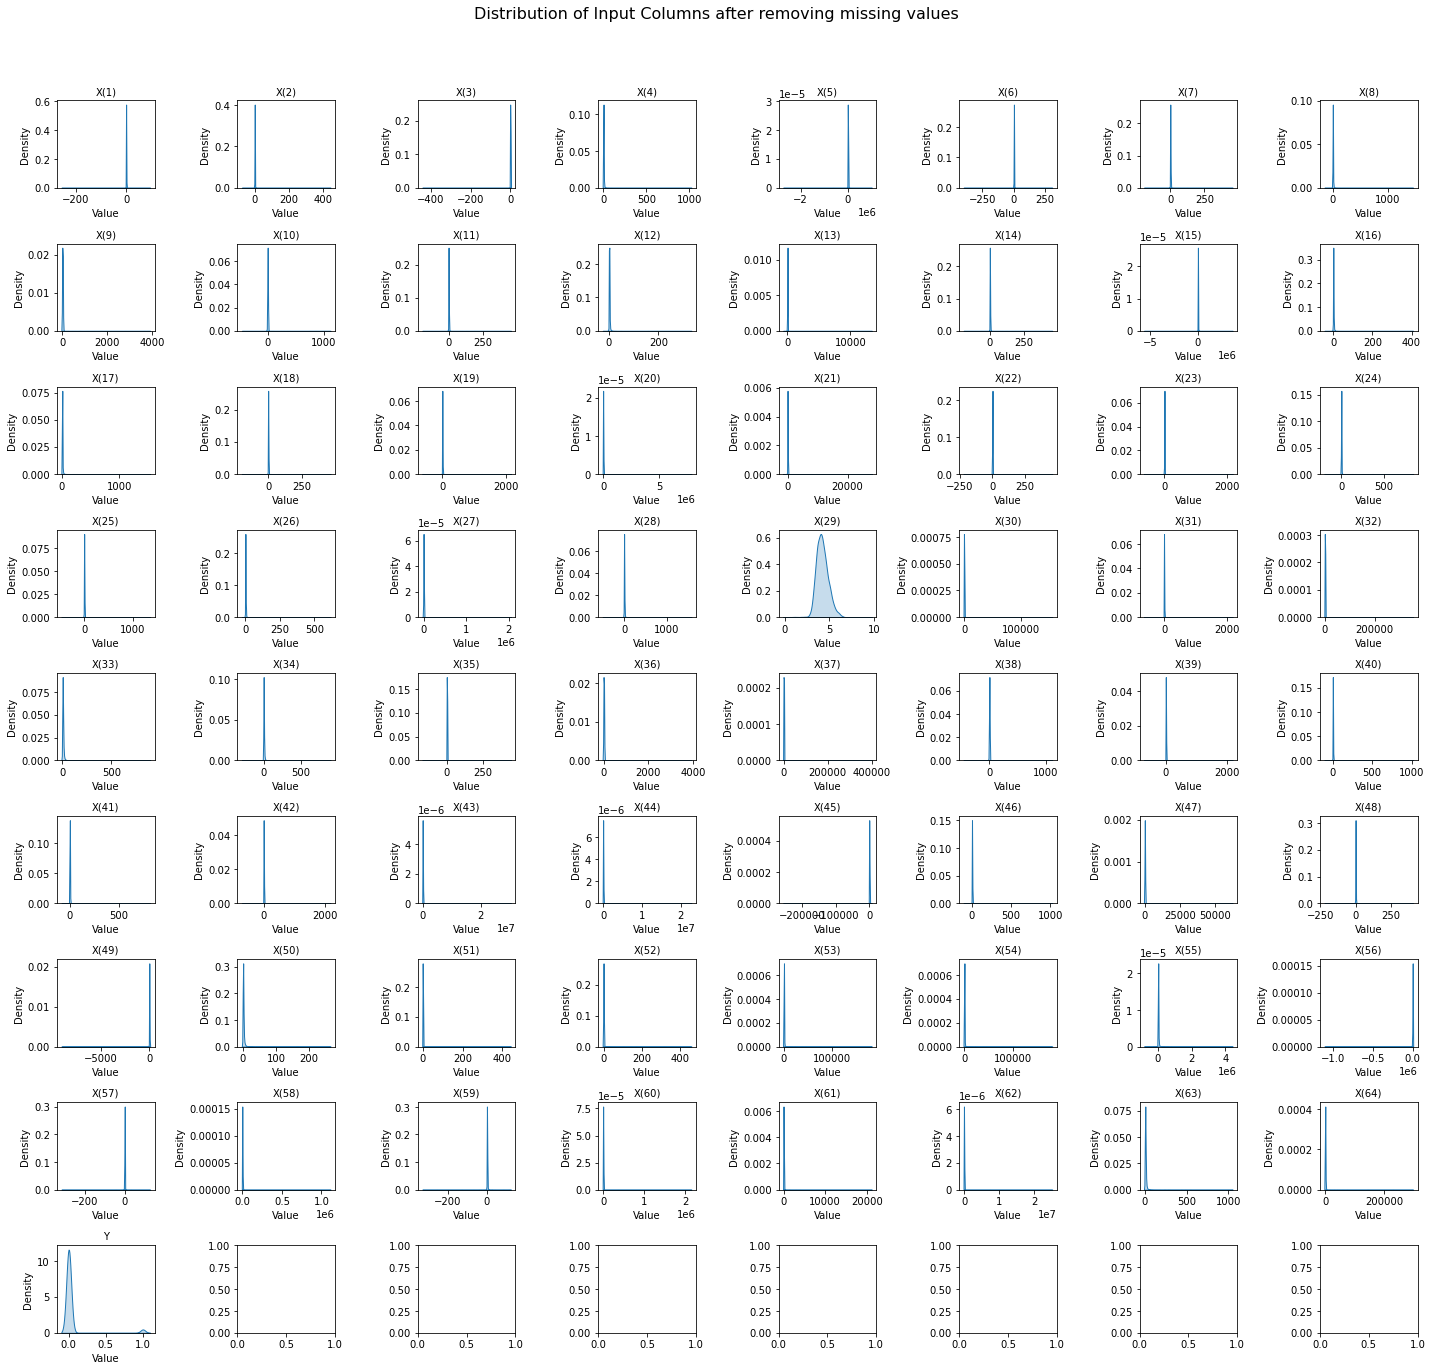

In [1052]:
# Number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

# Creating subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns after removing missing values', fontsize=16)

# Iterating through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Dealing with Outliers

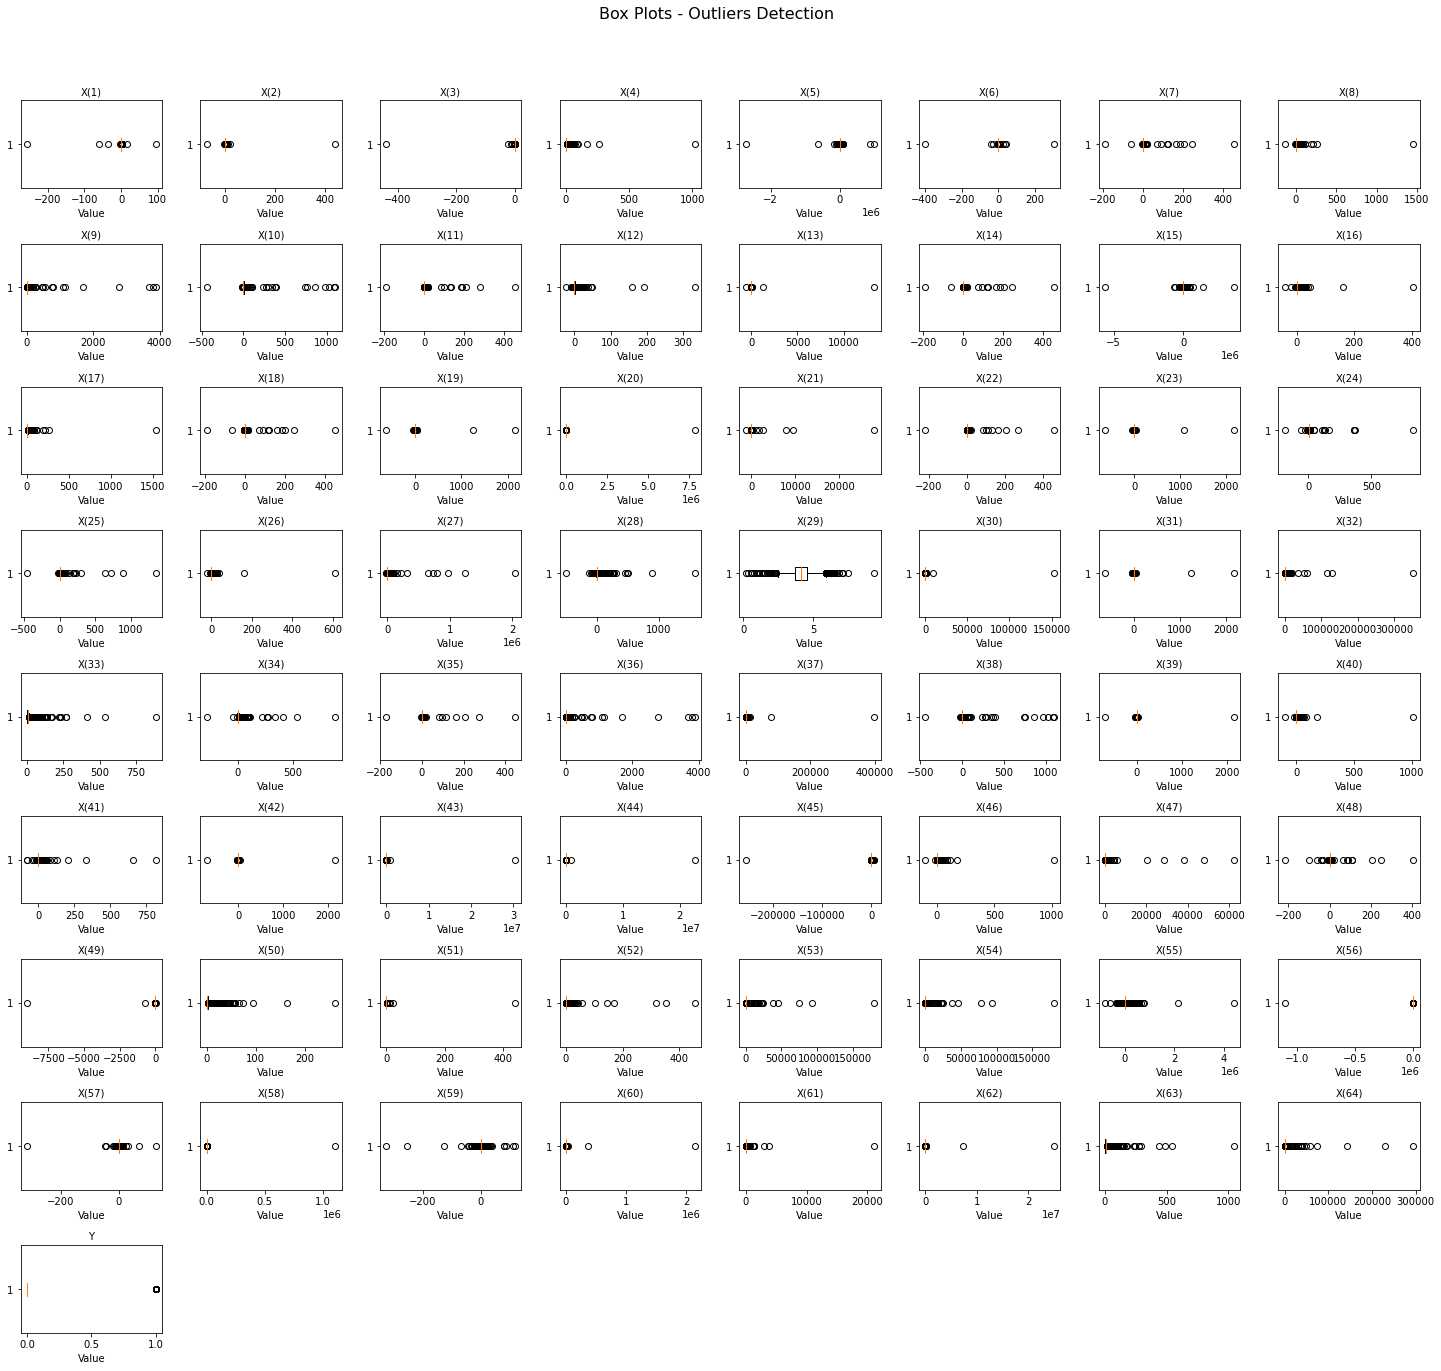

In [1053]:
# Creating subplots to display box plots
num_cols =  8  
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Box Plots - Outliers Detection', fontsize=16)

# Iterating through each column and create box plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot box plot for the column
    ax.boxplot(df[column], vert=False)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    
# Hiding empty subplots
for i in range(num_features, num_cols * num_rows):
    row_num = i // num_cols
    col_num = i % num_cols
    axes[row_num, col_num].axis('off')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [1054]:
import pandas as pd

def handle_outliers_iqr(df, target_col='Y', lower_limit=1.5, upper_limit=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for each column
    lower_bound = Q1 - lower_limit * IQR
    upper_bound = Q3 + upper_limit * IQR

    # Treat the outliers in each column
    for col in df.columns:
        if col != target_col:
            df[col] = df[col].apply(lambda x: lower_bound[col] if x < lower_bound[col] else x)
            df[col] = df[col].apply(lambda x: upper_bound[col] if x > upper_bound[col] else x)

    return df

# Call the function to handle outliers in the DataFrame
df = handle_outliers_iqr(df)


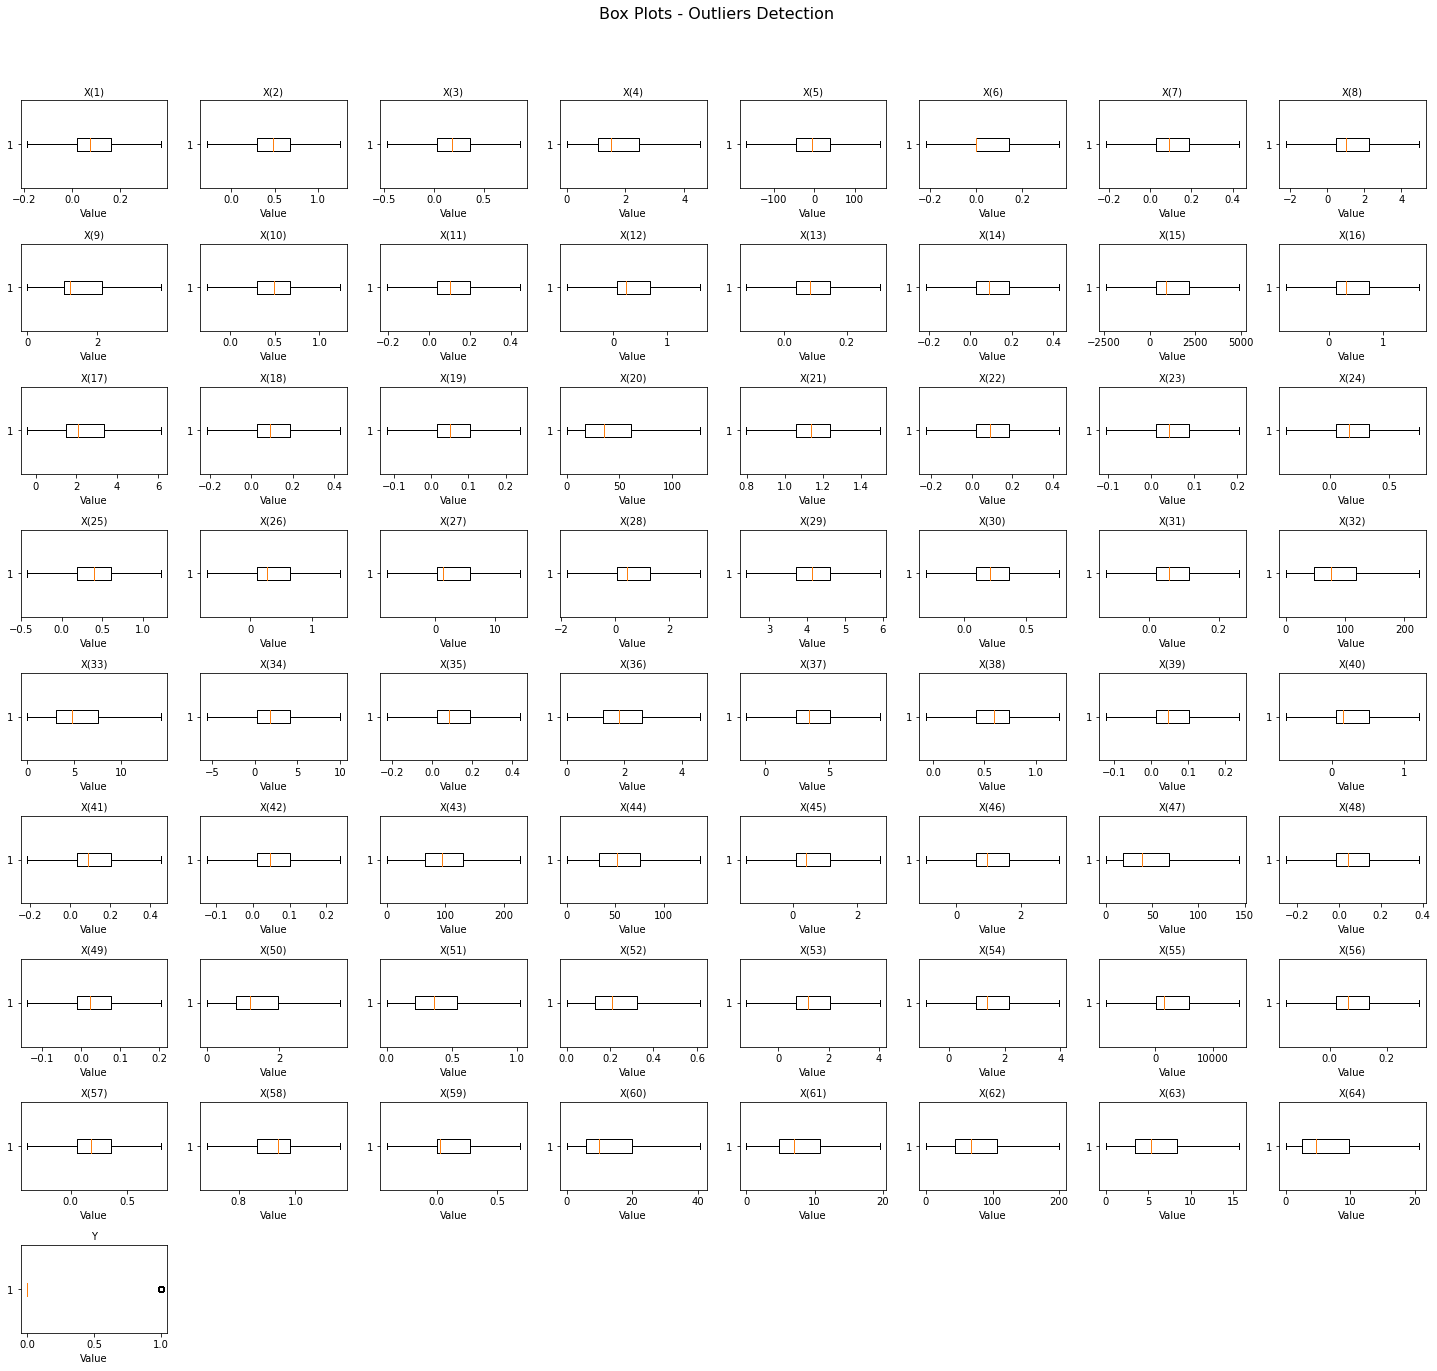

In [1055]:
# Creating subplots to display box plots
num_cols =  8  
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Box Plots - Outliers Detection', fontsize=16)

# Iterating through each column and create box plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot box plot for the column
    ax.boxplot(df[column], vert=False)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    
# Hiding empty subplots
for i in range(num_features, num_cols * num_rows):
    row_num = i // num_cols
    col_num = i % num_cols
    axes[row_num, col_num].axis('off')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [1056]:
df.to_csv(r'df1.csv', index=False)

In [2]:
!pip install jupyterthemes


  Using cached jupyterthemes-0.20.0-py2.py3-none-any.whl (7.0 MB)
  Using cached lesscpy-0.15.1-py2.py3-none-any.whl (46 kB)


In [4]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [ ]:
!jt 